In [44]:
import sounddevice as sd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.signal import argrelextrema
import wavio

In [34]:
# Função para gravar áudio
def record_audio(duration, filename):
    fs = 44100  # Taxa de amostragem
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()
    wavio.write(filename, audio, fs, sampwidth=3)

In [35]:
# Gravar áudio de registro
duration_registro = 2
filename_registro = 'audio_registro.wav'
record_audio(duration_registro, filename_registro)

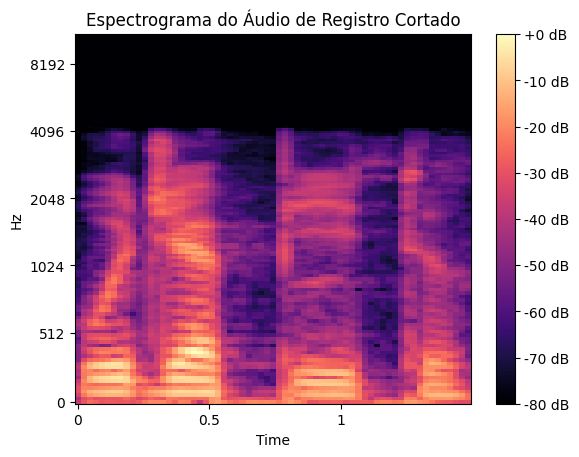

In [57]:
# Carregar áudio de registro
audio_registro, fs = librosa.load(filename_registro, sr=None)

# Cortar o áudio do primeiro momento da fala até o último
audio_registro_cortado, index = librosa.effects.trim(audio_registro, top_db=20)

# Calcular e plotar espectrograma do áudio de registro cortado
spectrogram_registro_cortado = librosa.feature.melspectrogram(y=audio_registro_cortado, sr=fs)
spectrogram_registro_db_cortado = librosa.power_to_db(spectrogram_registro_cortado, ref=np.max)

# Plotar o espectrograma cortado
librosa.display.specshow(spectrogram_registro_db_cortado, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do Áudio de Registro Cortado')
plt.show()


In [37]:
# Gravar áudio a ser comparado
duration_comparar = 2
filename_comparar = 'audio_a_comparar.wav'
record_audio(duration_comparar, filename_comparar)

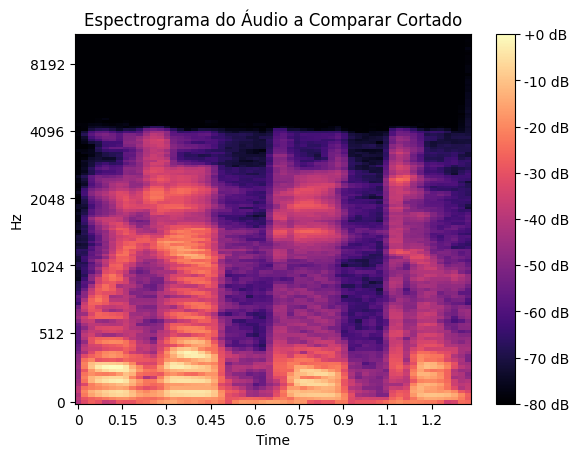

In [56]:
# Carregar áudio a ser comparado
audio_comparar, fs = librosa.load(filename_comparar, sr=None)

audio_comparar_cortado, index = librosa.effects.trim(audio_comparar, top_db=20)

# Calcular e plotar espectrograma do áudio a ser comparado cortado
spectrogram_comparar_cortado = librosa.feature.melspectrogram(y=audio_comparar_cortado, sr=fs)
spectrogram_comparar_db_cortado = librosa.power_to_db(spectrogram_comparar_cortado, ref=np.max)

# Plotar o espectrograma cortado
librosa.display.specshow(spectrogram_comparar_db_cortado, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do Áudio a Comparar Cortado')
plt.show()

In [59]:
# Comparar espectrogramas cortados
dist = distance.cosine(spectrogram_registro_db_cortado.ravel(), spectrogram_comparar_db_cortado.ravel())
print(f"Distância Euclidiana entre os Espectrogramas Cortados: {dist}")
print(f"Similaridade entre os Espectrogramas Cortados: {int(1 / (1 + dist)) * 100}%")

ValueError: shapes (8320,) and (7424,) not aligned: 8320 (dim 0) != 7424 (dim 0)